In [8]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

# Задача 1

In [2]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
np.random.seed(13)
X_stretched = np.dot(X, np.random.randn(2, 2)) 

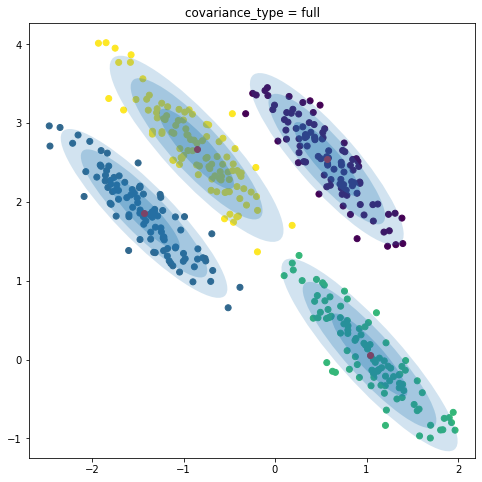

In [226]:
a = [0.4463, 1.3863, 2.4079]
fig = plt.figure(figsize=(8, 8))
splot = plt.subplot(1, 1, 1)
gm = GaussianMixture(n_components = 4, covariance_type = 'full').fit(X_stretched)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c = gm.predict(X_stretched))
plt.scatter(gm.means_[:,0], gm.means_[:,1], c = 'r')
plt.title('covariance_type = full')
for i in range(4):
    v, w = linalg.eigh(gm.covariances_[i])
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[0])*v[0], np.sqrt(a[0])*v[1], 180. + angle)
    ell1 = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[1])*v[0], np.sqrt(a[1])*v[1], 180. + angle)
    ell2 = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[2])*v[0], np.sqrt(a[2])*v[1], 180. + angle)
    ell.set_alpha(0.30)
    ell1.set_alpha(0.25)
    ell2.set_alpha(0.2)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell2)

plt.show()

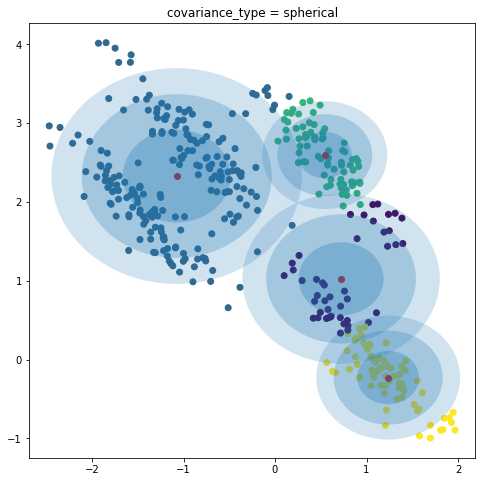

In [228]:
a = [0.4463, 1.3863, 2.4079]
fig = plt.figure(figsize=(8, 8))
splot = plt.subplot(1, 1, 1)
gm = GaussianMixture(n_components = 4, covariance_type = 'spherical').fit(X_stretched)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c = gm.predict(X_stretched))
plt.scatter(gm.means_[:,0], gm.means_[:,1], c = 'r')
plt.title('covariance_type = spherical')
for i in range(4):
    v = 2. * np.sqrt(2.) * np.sqrt(gm.covariances_[i])
    ell = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[0])*v, np.sqrt(a[0])*v)
    ell1 = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[1])*v, np.sqrt(a[1])*v)
    ell2 = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[2])*v, np.sqrt(a[2])*v)
    ell.set_alpha(0.30)
    ell1.set_alpha(0.25)
    ell2.set_alpha(0.2)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell2)

plt.show()

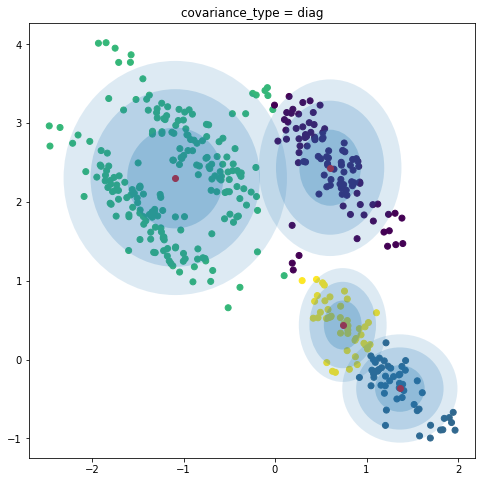

In [257]:
a = [0.4463, 1.3863, 2.4079]
fig = plt.figure(figsize=(8, 8))
splot = plt.subplot(1, 1, 1)
gm = GaussianMixture(n_components = 4, covariance_type = 'diag').fit(X_stretched)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c = gm.predict(X_stretched))
plt.scatter(gm.means_[:,0], gm.means_[:,1], c = 'r')
plt.title('covariance_type = diag')
for i in range(4):
    v, w = linalg.eigh([[gm.covariances_[i][0], 0], [0, gm.covariances_[i][1]]])
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[0])*v[0], np.sqrt(a[0])*v[1], 180. + angle)
    ell1 = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[1])*v[0], np.sqrt(a[1])*v[1], 180. + angle)
    ell2 = mpl.patches.Ellipse(gm.means_[i], np.sqrt(a[2])*v[0], np.sqrt(a[2])*v[1], 180. + angle)
    ell.set_alpha(0.25)
    ell1.set_alpha(0.20)
    ell2.set_alpha(0.15)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell2)

plt.show()

В качестветве критерия можно взять случай при которым min(|C_i - C_j|)  будет максимальным, где C_i - центры кластеров.
Т.е. в этом случае минимальное расстояние между центрами кластеров будет наибольшим.

# Задача 2

In [122]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA

In [196]:
digits = load_digits() 
pca = PCA(0.95)
data = pca.fit_transform(digits.data) 

In [208]:
gm = GaussianMixture(n_components = 40).fit(data)
X = pca.inverse_transform(gm.sample(n_samples = 100)[0])

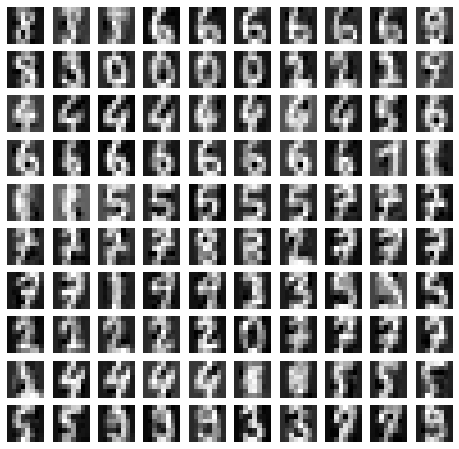

In [210]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
for i in range(100):
    ax[i//10, i % 10].axis('off')
    ax[i//10, i % 10].imshow(X.reshape(len(X), 8, 8)[i], cmap = 'gray')